# LetsGrowMore

# Name : Mayuri Pandharinath Shewale

# Task I:- Iris Flower Classification ML Project

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
url="http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

names=['sepal-length','sepal-width','petal-length','petal-width','species']
dataset=pd.read_csv(url,names=names)
dataset

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [24]:
print(dataset.shape)

(150, 5)


In [25]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [26]:
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


From this description, we can see all the descriptions about the data, like average length and width, minimum value, maximum value, the 25%, 50%, and 75% distribution value, etc.

Now let’s check the number of rows that belongs to each class:

In [27]:
dataset['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

We can see that each class of flowers has 50 rows.

To visualize the whole dataset we used the seaborn pair plot method. It plots the whole dataset’s information.

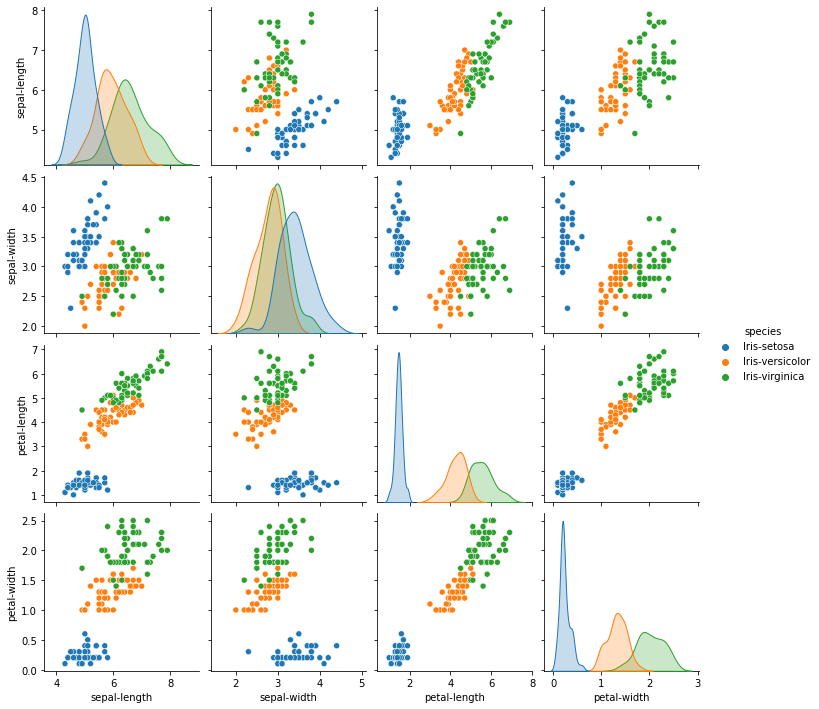

In [28]:
# Visualize the whole dataset
sns.pairplot(dataset, hue='species')

From this visualization, we can tell that iris-setosa is well separated from the other two flowers. And iris virginica is the longest flower and iris setosa is the shortest.

# Data Visualization

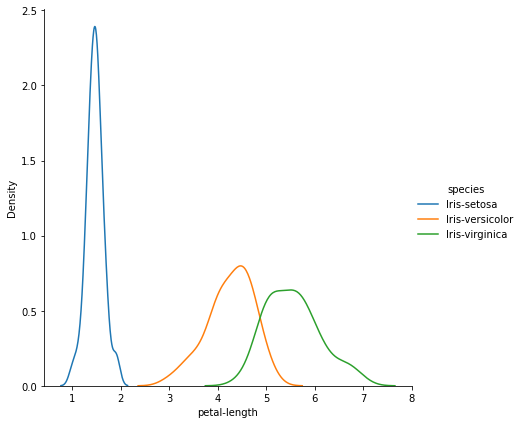

In [8]:
# A useful seaborn plot for looking at univariate relations is the kdeplot,
# which creates and visualizes a kernel density estimate of the underlying feature

sns.FacetGrid(dataset, hue="species", height=6) \
   .map(sns.kdeplot, "petal-length") \
   .add_legend()

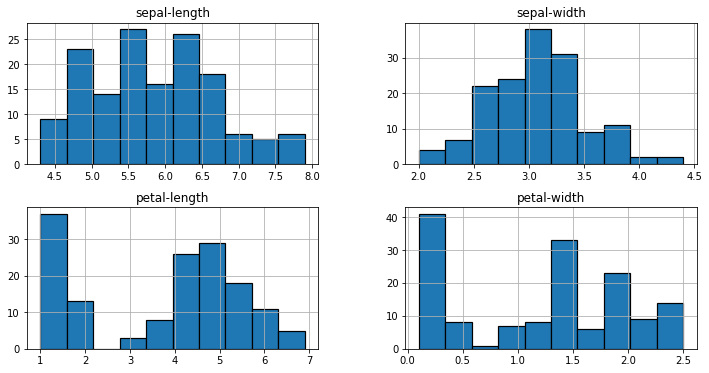

In [9]:
dataset.hist(edgecolor='black', linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()

Violin plot

# Plotting the violin plot to check the comparison of a variable distribution:

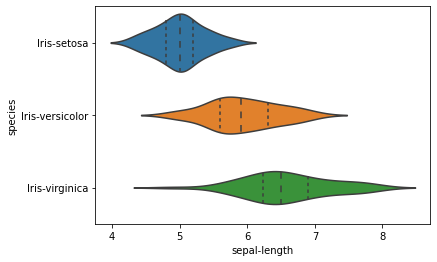

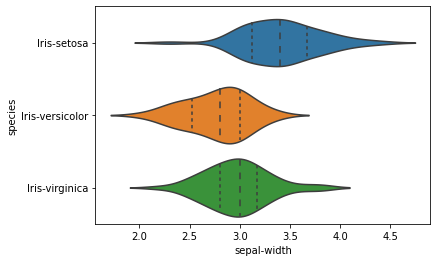

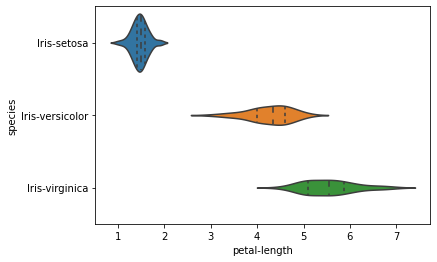

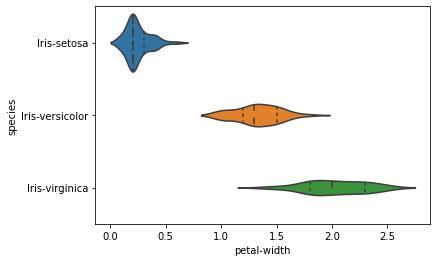

In [10]:
sns.violinplot(y='species', x='sepal-length', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='species', x='sepal-width', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='species', x='petal-length', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='species', x='petal-width', data=dataset, inner='quartile')
plt.show()

The above-plotted violin plot says that Iris-Setosa class is having a smaller petal length and petal width compared to other class.

# Heatmap
Plotting the heatmap to check the correlation.

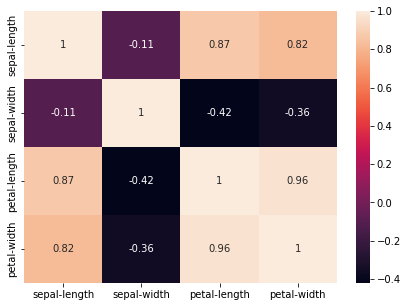

In [11]:
plt.figure(figsize=(7,5))
sns.heatmap(dataset.corr(), annot=True)
plt.show()

Observation--> The Sepal Width and Length are not correlated The Petal Width and Length are highly correlated We will use all the features for training the algorithm and check the accuracy

Now the given problem is a classification problem. Thus we will be using the classification algorithms to build a model.

Classification: Samples belong to two or more classes and we want to learn from already labeled data how to predict the class of unlabeled data

attributes-->An attribute is a property of an instance that may be used to determine its classification. In the following dataset, the attributes are the petal and sepal length and width. It is also known as Features.

Target variable, in the machine learning context is the variable that is or should be the output. Here the target variables are the 3 flower species.

In [12]:
# importing alll the necessary packages to use the various classification algorithms
from sklearn.linear_model import LogisticRegression # for Logistic Regression Algorithm
from sklearn.model_selection import train_test_split # to split the dataset for training and testing 
from sklearn.neighbors import KNeighborsClassifier # KNN classifier
from sklearn import svm # for suport vector machine algorithm
from sklearn import metrics # for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier # for using DTA

# Splitting The Data into Training And Testing Dataset

In [13]:
train, test = train_test_split(dataset, test_size=0.2) # our main data split into train and test
# the attribute test_size=0.3
#splits the data into 70% and 30% ratio. 
#train=70% and test=30%
print(train.shape)
print(test.shape)

(120, 5)
(30, 5)


In [14]:
train_X = train[['sepal-length','sepal-width','petal-length','petal-width']]       # taking the training data features
train_y = train.species          # output of the training data

test_X = test[['sepal-length','sepal-width','petal-length','petal-width']]     # taking test data feature
test_y = test.species           # output value of the test data

In [15]:
train_X.head()

,sepal-length,sepal-width,petal-length,petal-width
39,5.1,3.4,1.5,0.2
133,6.3,2.8,5.1,1.5
14,5.8,4.0,1.2,0.2
55,5.7,2.8,4.5,1.3
120,6.9,3.2,5.7,2.3


In [16]:
test_X.head()

,sepal-length,sepal-width,petal-length,petal-width
20,5.4,3.4,1.7,0.2
51,6.4,3.2,4.5,1.5
82,5.8,2.7,3.9,1.2
109,7.2,3.6,6.1,2.5
148,6.2,3.4,5.4,2.3


In [17]:
train_y.head()

39         Iris-setosa
133     Iris-virginica
14         Iris-setosa
55     Iris-versicolor
120     Iris-virginica
Name: species, dtype: object

# Normalization/Standardization of Data

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
Standard_obj = StandardScaler()
Standard_obj.fit(train_X)
x_train_std = Standard_obj.transform(train_X)
x_test_std = Standard_obj.transform(test_X)

# Support Vector Machine SVM

In [19]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(x_train_std, train_y)
print('Training data accuracy {:.2f}'.format(svm.score(x_train_std, train_y)*100))
print('Testing data accuracy {:.2f}'.format(svm.score(x_test_std, test_y)*100))

Training data accuracy 96.67
Testing data accuracy 96.67


On successful execution, the classifier gave a training and testing accuracy of about 99% and 90% respectively which is pretty decent.

SVM is giving very good accuracy . We will continue to check the accuracy for different models.

Now we will follow the same steps as above for training various machine learning algorithms.

# Decision Tree Classifier

In [20]:
from sklearn import tree
decision_tree = tree.DecisionTreeClassifier(criterion='gini')
decision_tree.fit(x_train_std, train_y)
print('Training data accuracy {:.2f}'.format(decision_tree.score(x_train_std, train_y)*100))
print('Testing data accuracy {:.2f}'.format(decision_tree.score(x_test_std, test_y)*100))

Training data accuracy 100.00
Testing data accuracy 93.33


# Logistic Rgression

In [21]:
model = LogisticRegression()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of Logistic Regression is: ', metrics.accuracy_score(prediction, test_y))

The accuracy of Logistic Regression is:  0.9666666666666667
